# Evaluation for Classification

In [48]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [2]:
dataset = load_digits()
X,y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [3]:
# Creating a dataset with imbalanced binaty classes:
# Negative class (0) is "not digit 1"
# Positive class (1) is "digit 1"
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print("Original labels:\t", y[1:30])
print("New binary labels:\t", y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [4]:
# Negatice class (0) is the most frequent class
np.bincount(y_binary_imbalanced) 

array([1615,  182], dtype=int64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

## Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful for comparison against actual classifiers, especially with imbalanced classes.

In [6]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)

# Therefore the dummy "most_frequent" classifier always predict class 0
y_dummy_predictions = dummy_majority.predict(X_test)
y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [8]:
svm = SVC (kernel="linear", C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

## Confusion matrices

### Binary (two-class) confusion matrix

In [9]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is mos frequent
dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print("Most frequent class (dummy classifier)\n", 
      confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [10]:
# Produces random predictions with the same class proportion as training set
dummy_classprop = DummyClassifier(strategy="stratified").fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print("Random class-proportional predicion (dummy classifier)\n", 
      confusion)

Random class-proportional predicion (dummy classifier)
 [[359  48]
 [ 40   3]]


In [11]:
svm = SVC(kernel="linear", C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print("Support Vector Machine classifier (linear kernel, C=1)\n",
     confusion)

Support Vector Machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print("Logistic Regression classifier (default settings)\n", 
      confusion)


Logistic Regression classifier (default settings)
 [[401   6]
 [  8  35]]


C:\Users\Personal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print("Decission Tree classifier (max_depth=2)\n",
     confusion)

Decission Tree classifier (max_depth=2)
 [[400   7]
 [ 17  26]]


## Evaluation metrics for binary classification

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

print(f"Accuracy: {accuracy_score(y_test, tree_predicted):.2f}")
print(f"Precision: {precision_score(y_test, tree_predicted):.2f}")
print(f"Recall: {recall_score(y_test, tree_predicted):.2f}")
print(f"F1: {f1_score(y_test, tree_predicted):.2f}")

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


We can see that a precision of 0.68 means that about 68 percent of the points in the positive prediction region to the left of the decision boundary or 13 out of the 19 instances are correctly labeled as positive. A recall of 0.87 means, that of all true positive instances, so all black points in the figure, the positive prediction region has 'found about 87 percent of them' or 13 out of 15.

In [15]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=["not 1", "1"]))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [16]:
print("Random class-proportional (dummy):\n",
     classification_report(y_test, y_classprop_predicted, target_names=["Not 1", "1"]))

print("SVM:\n",
     classification_report(y_test, svm_predicted, target_names=["Not 1", "1"]))

print("Logistic regression:\n",
     classification_report(y_test, lr_predicted, target_names=["Not 1", "1"]))

print("Decision tree:\n",
     classification_report(y_test, tree_predicted, target_names=["Not 1", "1"]))

Random class-proportional (dummy):
               precision    recall  f1-score   support

       Not 1       0.90      0.88      0.89       407
           1       0.06      0.07      0.06        43

    accuracy                           0.80       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.82      0.80      0.81       450

SVM:
               precision    recall  f1-score   support

       Not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression:
               precision    recall  f1-score   support

       Not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted a

## Decision functions

+ Each classifier score value per test point indicates how confidently the classifier predicts the positive class (large-magnitude positive values) or the negative class (large-magnitude negative values).

+ Chossing a fixed decision threshold gives a classification rule.

+ By sweeping the decision threshold through the entire tange of possible score values, we get a series of classification outcomes that form a curve.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# Show the decision_function scores for first 20 instances
y_score_list

C:\Users\Personal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, -29.828780122412308),
 (0, -19.382862030530184),
 (0, -29.198492315019383),
 (0, -21.74628543622176),
 (0, -22.642376912827647),
 (0, -11.805930993502658),
 (1, 6.4960075848698615),
 (0, -23.35461769048256),
 (0, -27.54381690026825),
 (0, -26.888212044652814),
 (0, -31.86296841355937),
 (0, -22.486081290223364),
 (0, -25.318028584392277),
 (0, -13.384518628616874),
 (0, -13.565643429049114),
 (0, -13.308352089647723),
 (1, 12.180938449259916),
 (0, -34.362430815142936),
 (0, -13.23154393413785),
 (0, -29.593982949361617)]

### Predicted Probability of Class Membership (predict_proba)

- Typical rule: choose most likely class
    - e.g. Class 1 if threshold > 0.50

- Adjusting thershold affects predictions of classifier

- Higher thershold result in a more conservative classifier
    - e.g. only predict Class 1 if estimated probability of Class 1 is above 70%
    - this increases precision. Doesn't predict Class 1 as often, but when it does, it gets high proportion of Class 1 instances correct

- Not all models provide realistic probability estimates

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

C:\Users\Personal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, 1.110517459593521e-13),
 (0, 3.820585956448586e-09),
 (0, 2.0857195297155586e-13),
 (0, 3.595077301190379e-10),
 (0, 1.4673734251399272e-10),
 (0, 7.460124509137367e-06),
 (1, 0.9984928214717077),
 (0, 7.198108854184124e-11),
 (0, 1.091119480651798e-12),
 (0, 2.1018314238773634e-12),
 (0, 1.452408028597767e-14),
 (0, 1.7156116075914767e-10),
 (0, 1.0104617842902744e-11),
 (0, 1.5387807630727936e-06),
 (0, 1.283853169890642e-06),
 (0, 1.6605631764475244e-06),
 (1, 0.9999948727626726),
 (0, 1.1928502123299163e-15),
 (0, 1.7931338274640275e-06),
 (0, 1.404418389683268e-13)]

##  Precision-Recall curves

<IPython.core.display.Javascript object>


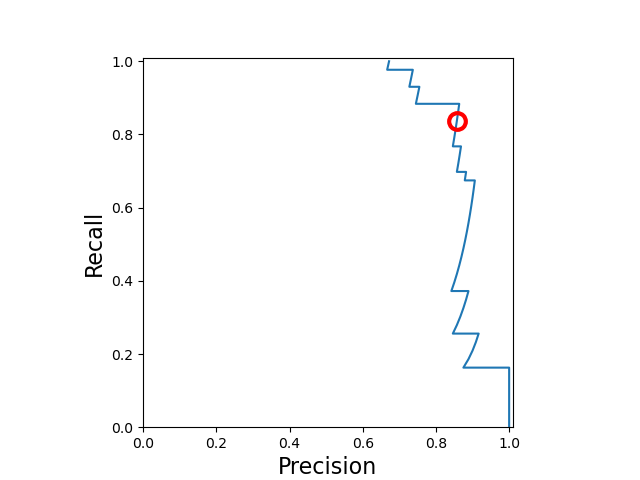

<ipython-input-19-de93a7d34ae7>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect("equal")


In [19]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.plot(precision, recall, label="Precision-Recall Curve")
plt.plot(closest_zero_p, closest_zero_r, "o", markersize=12, fillstyle="none", c="r", mew=3)
plt.xlabel("Precision", fontsize=16)
plt.ylabel("Recall", fontsize=16)
plt.xlim([0,1.01])
plt.ylim([0,1.01])
plt.axes().set_aspect("equal")
plt.show()

## ROC curves, Area-Under-Curve (AUC)

Receiver Operating Characteristic Curves:

X-axis: False Positive Rate
Y-axis: True Positive Rate

Top left corner:
- The "ideal" point
- False positive rate of zero
- True negative rate of one

"Steepness" of ROC curves is impornat:
- Maximize the true positive rate
- While minimizing the false positive rate

C:\Users\Personal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


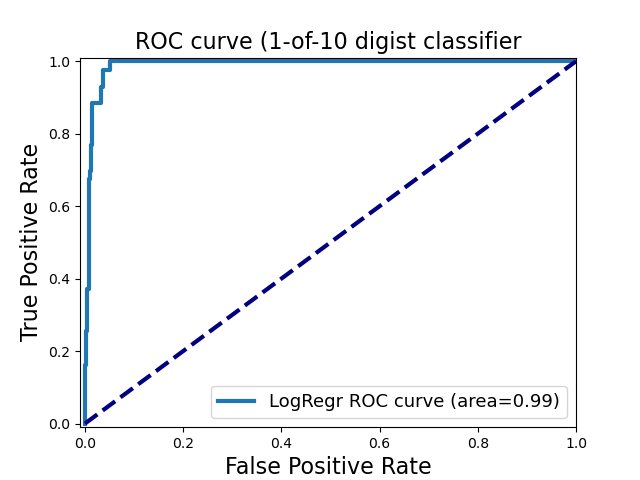

In [20]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, lw=3, label=f"LogRegr ROC curve (area={roc_auc_lr:.2})")
plt.legend(loc="lower right", fontsize=13)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title("ROC curve (1-of-10 digist classifier", fontsize=16)
plt.plot([0,1], [0,1], color="navy", lw=3, linestyle="--")
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.show()

<IPython.core.display.Javascript object>


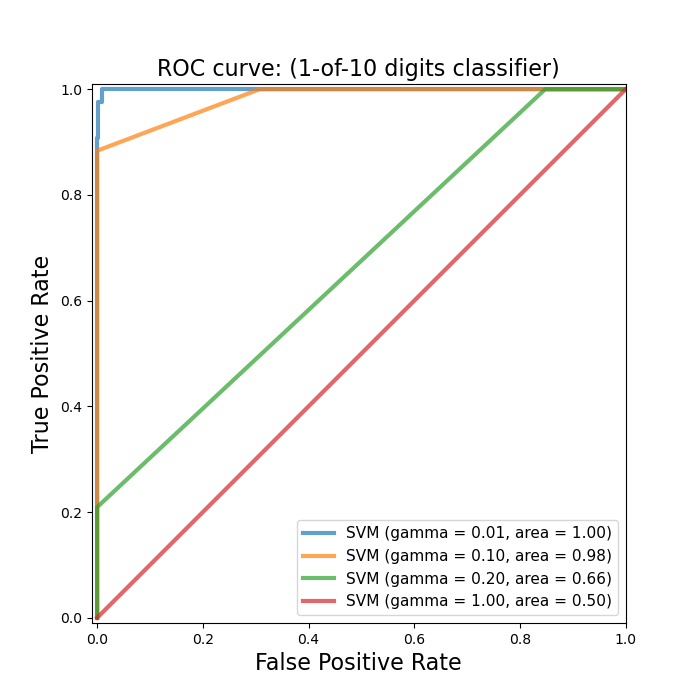

gamma = 0.01 accuracy = 0.91 AUC = 1.00
gamma = 0.10 accuracy = 0.90 AUC = 0.98
gamma = 0.20 accuracy = 0.90 AUC = 0.66
gamma = 1.00 accuracy = 0.90 AUC = 0.50


<ipython-input-42-80e4232240e9>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect("equal")


In [42]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure(figsize=(7,7))

for g in [0.01, 0.1, 0.2, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print(f"gamma = {g:.2f} accuracy = {accuracy_svm:.2f} AUC = {roc_auc_svm:.2f}")
    
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, label=f"SVM (gamma = {g:.2f}, area = {roc_auc_svm:.2f})")
    
plt.legend(loc="lower right", fontsize=11)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title("ROC curve: (1-of-10 digits classifier)", fontsize=16)

plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.axes().set_aspect("equal")

## Evaluation measures for multi-class classification

- Multi-class evaluation is an estensions of the binary case
    - A collection of true vs predicted binary outcomes, one per class
    - Confusion matrices are especially useful
    - Classification report
    
- Overall evaluation metrics are averages across classes
    - But there are different ways to average multi-class results
    - The support (number of instances) for each class is important to consider, e.g. in case of imbalanced classes
    
- Multi-label classification: each instance can have multiple labels 

### Multi-class confusion matrix

<IPython.core.display.Javascript object>


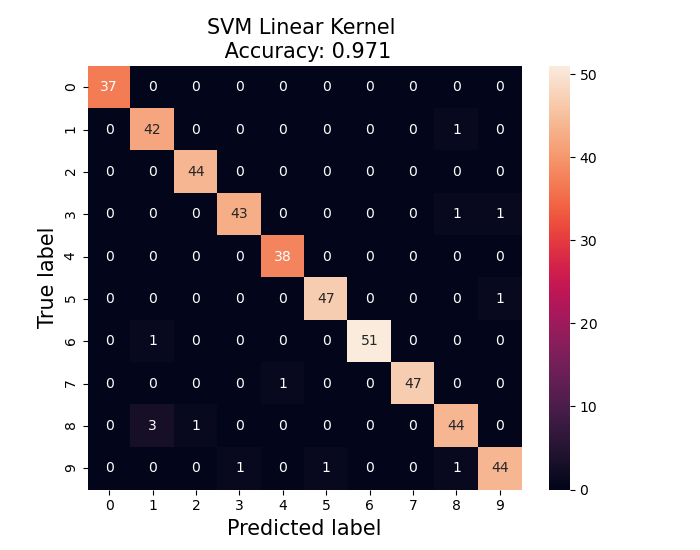

Text(58.222222222222214, 0.5, 'True label')

In [77]:
dataset = load_digits()

X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)

svm = SVC(kernel="linear").fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_mc = pd.DataFrame(confusion_mc, index=[x for x in range(0,10)], 
                     columns=[x for x in range(0,10)])

plt.figure(figsize=(7,5.5))
sns.heatmap(df_mc, annot=True)
plt.title(f"SVM Linear Kernel \n \
Accuracy: {accuracy_score(y_test_mc, svm_predicted_mc):.3f}", fontsize=15)

plt.xlabel("Predicted label", fontsize=15)
plt.ylabel("True label", fontsize=15)


svm = SVC(kernel="rbf").fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_mc = pd.DataFrame(confusion_mc, index=[x for x in range(0,10)], 
                     columns=[x for x in range(0,10)])

plt.figure(figsize=(7,5.5))
sns.heatmap(df_mc, annot=True)
plt.title(f"SVM RBF Kernel \n \
Accuracy: {accuracy_score(y_test_mc, svm_predicted_mc):.3f}", fontsize=15)

plt.xlabel("Predicted label", fontsize=15)
plt.ylabel("True label", fontsize=15)

### Multi-class classification report

In [78]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



### Micro- vs. macro-averaged metrics

<u>**Macro-average**</u>

Each class has <u>equal</u> weight

1. Compute metric withen each class
2. Average resulting metrics across classes

<u>**Micro-average**</u>

Each instance has <u>equal</u> weight

1. Aggregate outcomes across all classes
2. Compute metrics with aggregate outcomes

- If the classes have about the same number of instances, macro- and micro-average will be aout the same.

- If some classes are much larger (more instances) than others, and you want to:
    - Weight your metric toward the largest ones, use micro-averaging.
    - Weight your metric toward the smallest ones, use macro-averaging.

- If the micro-average is much lower than the macro-average, then examine the larher classes for poor metric performance.

- If the macro-average is much lower than the micro-average, then examine the smaller classes for poor metric performance.

In [79]:
print(f"Micro-averaged precision = {precision_score(y_test_mc, svm_predicted_mc, average = 'micro'):.2f}\
 (treat instances equally)")

print(f"Macro-averaged precision = {precision_score(y_test_mc, svm_predicted_mc, average = 'micro'):.2f}\
 (treat classes equally)")

Micro-averaged precision = 0.97 (treat instances equally)
Macro-averaged precision = 0.97 (treat classes equally)


In [80]:

print(f"Micro-averaged f1 precision = {f1_score(y_test_mc, svm_predicted_mc, average = 'micro'):.2f}\
 (treat instances equally)")

print(f"Macro-averaged f1 precision = {f1_score(y_test_mc, svm_predicted_mc, average = 'micro'):.2f}\
 (treat classes equally)")

Micro-averaged f1 precision = 0.97 (treat instances equally)
Macro-averaged f1 precision = 0.97 (treat classes equally)


## Regression evaluation metrics

- Typically r2_scroe is enough
    - Reminder: computes how well future instances will be predicted
    - Best possible score is 1.0
    - Constant prediction score is 0.0
    
- Alternative metrics include:
    - mean_abosolute_error (absolute difference of target & predicted values)
    - mean_squared_error (squared difference of target & predicted values)
    - median_absolute_error (robust to outliers)

Linear model, coefficients: [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


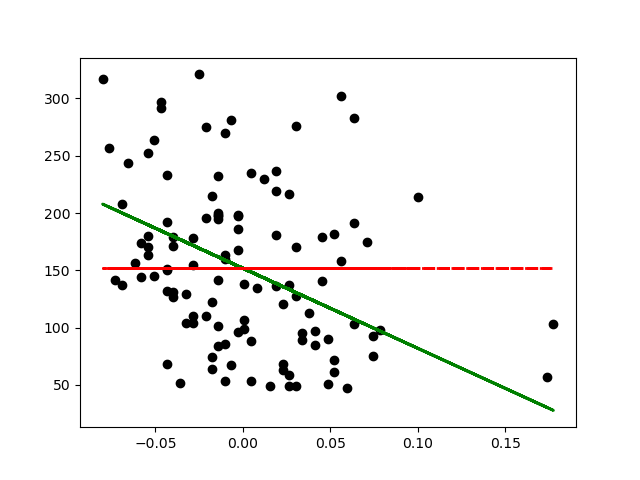

In [82]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
lr_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lr.predict(X_test)
y_predict_dummy_mean = lr_dummy_mean.predict(X_test)

print(f"Linear model, coefficients: {lr.coef_}")
print(f"Mean squared error (dummy): {mean_squared_error(y_test, y_predict_dummy_mean):.2f}")
print(f"Mean squared error (linear model): {mean_squared_error(y_test, y_predict):.2f}")
print(f"r2_score (dummy): {r2_score(y_test, y_predict_dummy_mean):.2f}")
print(f"r2_score (linear model): {r2_score(y_test, y_predict):.2f}")

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

## Model selection using evaluation metrics

- Train/Test on same data
    - Single metric.
    - Typically overfits and likely won't generalize well to new data.
    - But can serve as a sanity cjeck: low accuracy on the training set may indicate an implementation problem.

- Single train/test split
    - Single metric. 
    - Speed and simplicity 
    - Lack of variance information

- K-fold cross-validation
    - K train-test splits.
    - Average metric over all splits.
    - Can be combined with parameter grid search: GridSearchCV (def. cv=3)

### Cross-validation example

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel="linear", C=1)

# accuracy is the default scoring metric
print("Cross-validation (accuracy)", cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print("Cross-validation (AUC)", cross_val_score(clf, X, y, cv=5, scoring = "roc_auc"))
# use recall as scoring metric
print("Cross-validation (recall)", cross_val_score(clf, X, y, cv=5, scoring = "recall"))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


### Grid search example

In [86]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel="rbf")
grid_values = {"gamma": [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# Default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print("Grid best parameter (max. accuracy): ", grid_clf_acc.best_params_)
print("Grid best score (accuracy): ", grid_clf_acc.best_score_)

# Alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = "roc_auc")
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print("Test set AUC: ", roc_auc_score(y_test, y_decision_fn_scores_auc))
print("Grid best parameter (max. AUC): ", grid_clf_auc.best_params_)
print("Grid best score (AUC): ", grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9985157648354676
Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  1.0


### Evaluation metrics supported for model selection

In [88]:
from sklearn.metrics import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


## Two-feature classification example using the digits dataset

### Optimizing a classifier using different evaluation metrics

- The precision-oriented classifier with class weight of two, tries har to reduce false positives while increasing true positives.

- The recall-oriented classifier with class weight of fifty, tries har to reduce false negatives while increasing true positives.

- The decission boundary for the F1-oriented clasifier has an optimal class weight of two, has an intermediate positioning between the precision- and recall-oriented decision boundaries. (F1 is the harmonic mean of precision and recall)

- The AUC-oriented classifier, with optimal class weight of 5, has a similar decision boundary to the F1-oriented classifier, but shifhted slightly in favor of hogher recall.

<IPython.core.display.Javascript object>


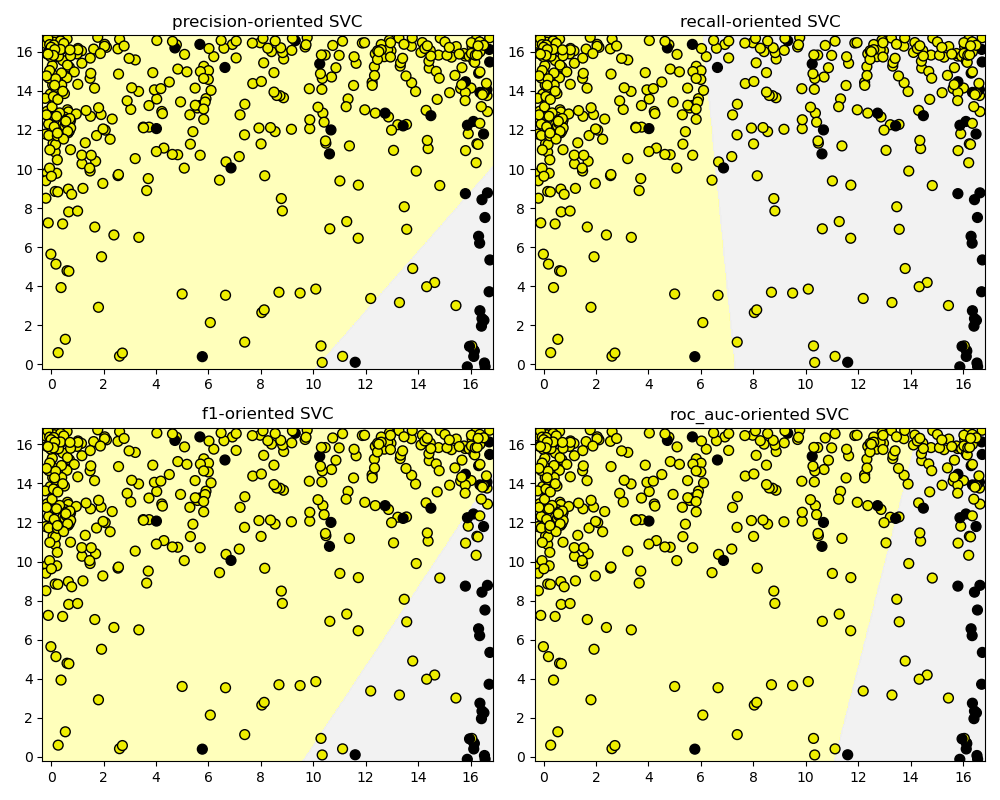

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5333093763821318
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9285714285714285
Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.5463444751969343
Grid best parameter (max. roc_auc): {'class_weight': {1: 4}}
Grid best score (roc_auc): 0.8947569269240336


In [92]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(10,8))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

### Precision-recall curve for the default SVC classifier (with balanced class weights)

<IPython.core.display.Javascript object>


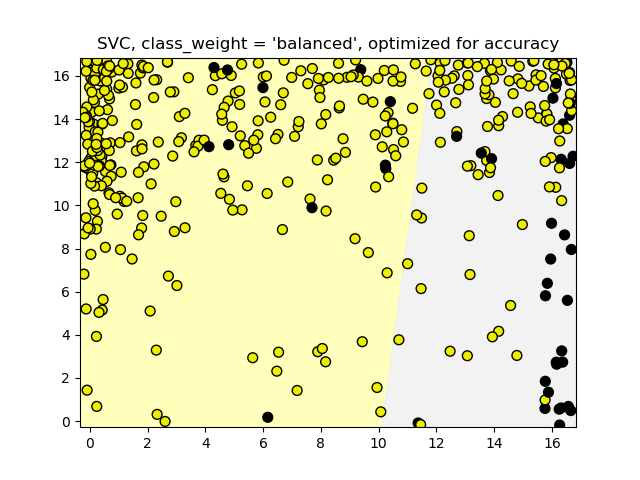

<IPython.core.display.Javascript object>


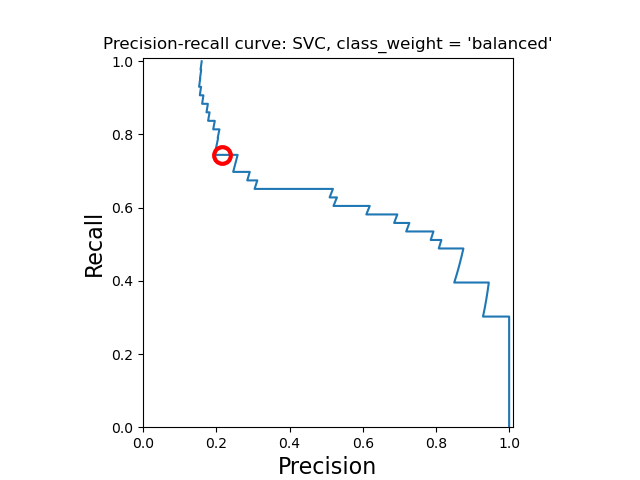

At zero threshold, precision: 0.22, recall: 0.74


<ipython-input-93-a6507eac1162>:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))

# Concluding notes

- Using only corss-validation or a test set to do model selection may lead to more subtle overfitting / optimistic generalization estimates

- Instead, use three data splits:
    1. Training set (model building)
    2. Validation set (model selection)
    3. Test set (final evaluation)

- In practice:
    - Create an initial training/test split
    - Do cross-validation on the training data for model/parameter selection
    - Save the held-out test set for final model evaluation


- Accuracy is often no the right evaluation metric for many real-world machine learning tasks
    - False positives and false negatives may need to be treated very differently 
    - Make sure you understand the needs of your application and choose an evaluation metric that matches your application, user or business goals.

- Examples of additional evaluation methods include:
    - Learning curve: How much does accuracy (or other metric) change as a function of the amount of training data?
    - Sensitivity analysis: How much does accuracy (or other metric) change as a function of key learning parameter values?